In [1]:
from cyclum.hdfrw import hdf2mat

pseudotime = hdf2mat("/home/shaoheng/Documents/data/EMTAB2805/oscope-pseudotime.h5")


In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import sklearn.preprocessing

from cyclum import writer

input_file_mask = '/home/shaoheng/Documents/data/mESC/mesc-tpm'

def preprocess(input_file_mask):
    """
    Read in data and perform log transform (log2(x+1)), centering (mean = 1) and scaling (sd = 1).
    """
    tpm = writer.read_df_from_binary(input_file_mask).T
    sttpm = pd.DataFrame(data=skl.preprocessing.scale(np.log2(tpm.values + 1)), index=tpm.index, columns=tpm.columns)
    
    label = pd.read_csv(input_file_mask + '-label.txt', sep="\t", index_col=0).T
    return sttpm, label

sttpm, label = preprocess(input_file_mask)

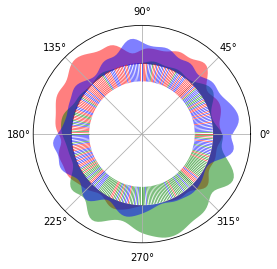

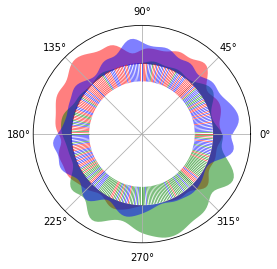

In [8]:
import cyclum.illustration
color_map = {'stage': {"g0/g1": "red", "s": "green", "g2/m": "blue"},
                 'subcluster': {"intact": "cyan", "perturbed": "violet"}}
cyclum.illustration.plot_round_distr_color(pseudotime.values / 288 * 2 * 3.14159, label['stage'], color_map['stage'])

In [4]:
label['stage']

G1_cell1_count    g0/g1
G1_cell2_count    g0/g1
G1_cell3_count    g0/g1
G1_cell4_count    g0/g1
G1_cell5_count    g0/g1
                  ...  
S_cell92_count     g2/m
S_cell93_count     g2/m
S_cell94_count     g2/m
S_cell95_count     g2/m
S_cell96_count     g2/m
Name: stage, Length: 288, dtype: object

In [5]:
pseudotime.values

array([[ 57.],
       [256.],
       [ 51.],
       [ 35.],
       [162.],
       [ 70.],
       [ 15.],
       [196.],
       [ 55.],
       [152.],
       [ 20.],
       [ 19.],
       [ 73.],
       [178.],
       [273.],
       [ 87.],
       [153.],
       [171.],
       [107.],
       [169.],
       [ 52.],
       [ 86.],
       [109.],
       [ 89.],
       [ 83.],
       [110.],
       [ 33.],
       [ 63.],
       [254.],
       [283.],
       [118.],
       [166.],
       [139.],
       [ 53.],
       [255.],
       [124.],
       [286.],
       [125.],
       [128.],
       [ 64.],
       [179.],
       [112.],
       [ 13.],
       [117.],
       [  8.],
       [ 97.],
       [ 39.],
       [101.],
       [ 61.],
       [114.],
       [ 96.],
       [105.],
       [ 95.],
       [201.],
       [154.],
       [ 88.],
       [ 85.],
       [141.],
       [159.],
       [129.],
       [270.],
       [ 40.],
       [106.],
       [111.],
       [ 71.],
       [123.],
       [10

In [6]:
import cyclum.evaluation
normalized_pseudotime = np.squeeze(pseudotime.values) / 288 * 3.14159
g1 = cyclum.evaluation.periodic_parzen_estimate(normalized_pseudotime[label['stage'] == 'g0/g1'])
g2 = cyclum.evaluation.periodic_parzen_estimate(normalized_pseudotime[label['stage'] == 'g2/m'])
s = cyclum.evaluation.periodic_parzen_estimate(normalized_pseudotime[label['stage'] == 's'])

In [7]:
cyclum.evaluation.precision_estimate([g1, g2, s], np.squeeze(label['stage']), ['g0/g1', 'g2/m', 's'])

Exception: Data must be 1-dimensional